In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [26]:
data = pd.read_csv('Default.csv')
X1 = np.array(data['balance'].values.reshape(-1,1))
X2 = np.array(data['income'].values.reshape(-1,1))
Y = np.array(data['default'].values.reshape(-1,1))

Haciendo la primera figura

In [54]:
X1T=[]
X2T=[]
X1F=[]
X2F=[]
Ys=[]
for i in range(len(Y)):
    if (Y[i]=='Yes'):
        X1T.append(X1[i])
        X2T.append(X2[i])
        Ys.append(1)
    else:
        X1F.append(X1[i])
        X2F.append(X2[i])
        Ys.append(0)
print(len(X1F))

9667


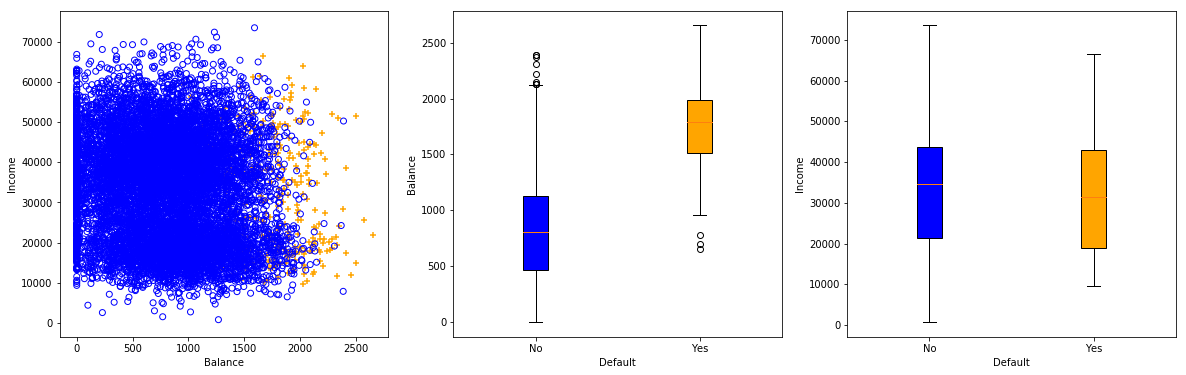

In [55]:
plt.figure(figsize=(20,6))

plt.subplot(131)
_= plt.scatter(X1T,X2T,c='orange', marker="+",edgecolors='none')
_= plt.scatter(X1F,X2F,facecolors='none',edgecolors='b')
_ = plt.xlabel('Balance')
_ = plt.ylabel('Income')

plt.subplot(132)
b1 = plt.xlabel('Default')
b1 = plt.ylabel('Balance')
b1 = plt.boxplot([X1F, X1T],patch_artist=True, labels=['No', 'Yes'])
colors = ['b', 'orange']
for patch, color in zip(b1['boxes'], colors):
        patch.set_facecolor(color)

plt.subplot(133)
b2 = plt.xlabel('Default')
b2 = plt.ylabel('Income')
b2 = plt.boxplot([X2F, X2T],patch_artist=True, labels=['No', 'Yes'])
colors = ['b', 'orange']
for patch, color in zip(b2['boxes'], colors):
        patch.set_facecolor(color)


Haciendo la segunda figura

In [56]:
logreg = LogisticRegression()
X1_train, X1_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X1, Y, test_size=0.5)
camaleon = logreg.fit(X1, Y)
beta0 = logreg.intercept_
beta1 = logreg.coef_
def modelo(x,b0,b1):
    return ((np.exp(b0+b1*x))/(1+np.exp(b0+b1*x)))

/home/yvan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yvan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0, 2700)

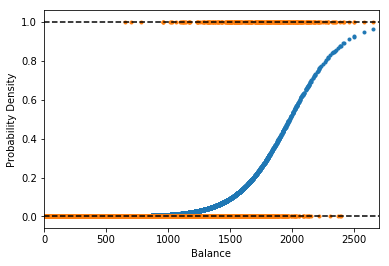

In [73]:
plt.scatter(X1,modelo(X1,beta0,beta1),marker='.')
plt.scatter(X1,Ys,marker='.')
plt.hlines(1,0,2700,linestyles='dashed')
plt.hlines(0,0,2700,linestyles='dashed')
plt.xlabel('Balance')
plt.ylabel('Probability Density')
plt.xlim((0,2700))